In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm,norm

# Normal distribution
The probability density function is
\begin{equation}
f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right)
\end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation.

In [2]:
def npdf(x,mu,sigma):
    return np.exp(-((x-mu)/sigma)**2/2)/(sigma*np.sqrt(2*np.pi))

## Check with Scipy

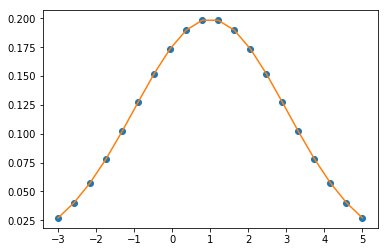

In [3]:
x = np.linspace(-3,5,20)
mu = 1.0
sigma = 2.0
plt.plot(x,npdf(x,mu,sigma),'o')
plt.plot(x,norm.pdf(x,mu,sigma))

# Lognormal distribution
A lognormal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. If $X$ is lognormally distributed, then $Y=\ln(X)$ has a normal distribution.

Let $Z$ be a standard normal variable and let $\mu,~\sigma>0$ be two real numbers. Then the distribution of the random variable
$$X=e^{\mu+\sigma Z}$$
is a lognormal distribution with parameters $\mu$ and $\sigma$. These are mean and standard deviation of the variable's natural logarithm.

The geometric parameters $\mu^*=e^\mu$ and $\sigma^*=e^\sigma$. $\mu^*$ is the median of the distribution and $\sigma^*$ is useful for determining scatter intervals.

## Probability density function
A positive random variable $X$ is lognormally distributed if the logarithm of $X$ is normally distributed
$$\ln(X)\sim N(\mu,\sigma^2)$$
Then the PDF is
\begin{equation}
f(x)=\frac{1}{x\sigma\sqrt{2\pi}}\exp\left(-\frac{(\ln x-\mu)^2}{2\sigma^2}\right)
\end{equation}

In [4]:
def lnpdf(x,mu,sigma):
    return np.exp(-(np.log(x)-mu)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))

## Check with Scipy

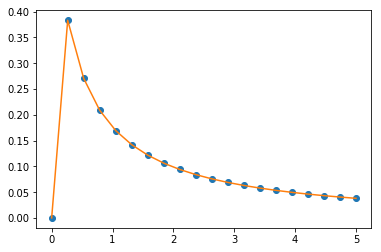

In [5]:
xn = np.linspace(1e-5,5,20)
plt.plot(xn,lnpdf(xn,mu,sigma),'o')
plt.plot(xn,lognorm.pdf(xn,sigma,scale=np.exp(mu)))

# Mode difference
With 
$$\ln(X)\sim Y\sim N(\mu,\sigma^2)$$
the mode of $Y$ is $\mu$ whereas that of $X$ is $\exp(\mu-\sigma^2)$.

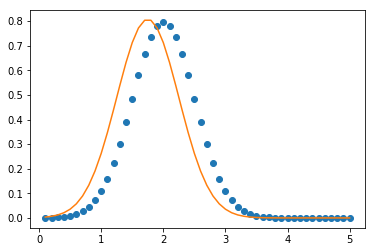

In [32]:
x = np.logspace(1e-1,5,base=np.e)
mu = 2.0
sigma = 0.5
plt.plot(np.log(x),npdf(np.log(x),mu,sigma),'o')
plt.plot(np.log(x),lnpdf(x,mu,sigma)*6.6)

To match the mode, lognormal distribution is shifted to right $\mu^2$

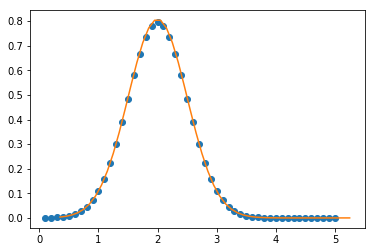

In [33]:
plt.plot(np.log(x),npdf(np.log(x),mu,sigma),'o')
plt.plot(np.log(x)+sigma**2,lnpdf(x,mu,sigma)*6.6)

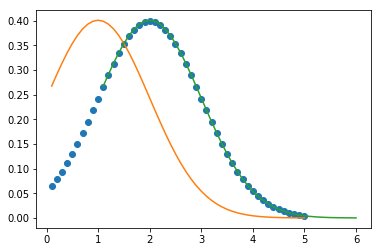

In [34]:
sigma = 1.0
plt.plot(np.log(x),npdf(np.log(x),mu,sigma),'o')
plt.plot(np.log(x),lnpdf(x,mu,sigma)*4.5)
plt.plot(np.log(x)+sigma**2,lnpdf(x,mu,sigma)*4.5)

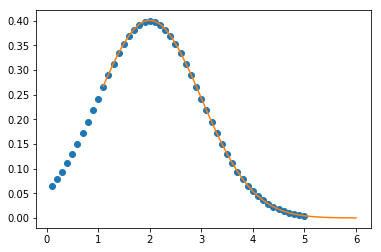

In [35]:
plt.plot(np.log(x),npdf(np.log(x),mu,sigma),'o')
plt.plot(np.log(x*np.exp(sigma**2)),lnpdf(x,mu,sigma)*4.5)

## Translation
To have the same distribution, the modes of normal distribution and lognormal distribution should coincide. Hence, the lognormal distribution should be translated by $\sigma^2$ to right direction in log scale. This can be done by changing $\mu$ to $\mu+\sigma^2$ so that the PDF has the mode at $\mu$ instead of $\mu-\sigma^2$.
so that the PDF is given by
\begin{equation}
f(x)=\frac{1}{x\sigma\sqrt{2\pi}}\exp\left(-\frac{\left(\ln x-(\mu+\sigma^2)\right)^2}{2\sigma^2}\right)
\end{equation}

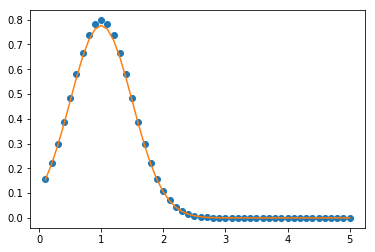

In [47]:
plt.plot(np.log(x),npdf(np.log(x),mu,sigma),'o')
plt.plot(np.log(x),lnpdf(x,mu+sigma**2,sigma)*3)

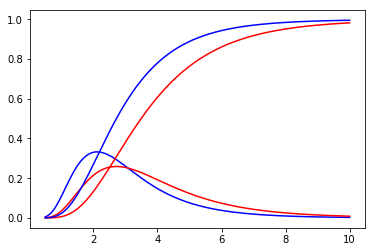

In [59]:
from scipy.special import erf
mu = 1.0
sigma = 0.5
xn = np.linspace(5e-1,10,1000)
plt.plot(xn,lnpdf(xn,mu,sigma),'b')
plt.plot(xn,lnpdf(xn,mu+sigma**2,sigma),'r')
plt.plot(xn,(1+erf((np.log(xn)-mu-sigma**2)/(np.sqrt(2)*sigma)))/2,'r')
plt.plot(xn,(1+erf((np.log(xn)-mu)/(np.sqrt(2)*sigma)))/2,'b')

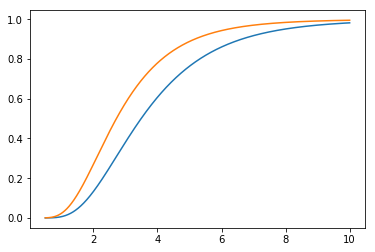

In [57]:
from scipy.special import erf
plt.plot(xn,(1+erf((np.log(xn)-mu-sigma**2)/(np.sqrt(2)*sigma)))/2)
plt.plot(xn,(1+erf((np.log(xn)-mu)/(np.sqrt(2)*sigma)))/2)

In [50]:
from scipy.integrate import quad,dblquad
def integrand(x):
    return lnpdf(x,mu+sigma**2,sigma)
den,err = quad(integrand,0,100)
print(den)

0.999999999990284
